In [1]:
import random
import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-whitegrid')

input_frame = pd.read_csv("portfolio_data.csv")
input_frame

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285
...,...,...,...,...,...
1515,5/8/2019,1917.770020,283.149994,6171.959961,364.369995
1516,5/9/2019,1899.869995,282.160004,6358.290039,362.750000
1517,5/10/2019,1889.979980,278.369995,7191.359863,361.040009
1518,5/13/2019,1822.680054,273.880005,7980.129883,345.260010


In [2]:
size = len(input_frame)
train_size_multiplier = 0.7
train_size = int(size * train_size_multiplier)

train = input_frame.iloc[:train_size] 
test = input_frame.iloc[train_size:]

train

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285
...,...,...,...,...,...
1059,7/14/2017,1001.809998,205.842590,1975.079956,161.119995
1060,7/17/2017,1010.039978,204.898026,2320.229980,161.699997
1061,7/18/2017,1024.449951,208.046509,2282.580078,183.600006
1062,7/19/2017,1026.869995,209.099304,2866.020020,183.860001


In [3]:
dates = pd.DataFrame(train['Date'], train.index)
amzn = pd.DataFrame(train['AMZN'], train.index)
dpz = pd.DataFrame(train['DPZ'], train.index)
btc = pd.DataFrame(train['BTC'], train.index)
nflx = pd.DataFrame(train['NFLX'], train.index)

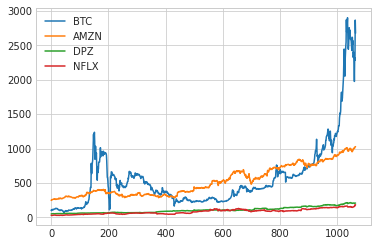

In [4]:
plt.figure(); ax = btc.plot(); amzn.plot(ax=ax); dpz.plot(ax=ax); nflx.plot(ax=ax); plt.legend(); 

In [5]:
amzn

,AMZN
0,248.229996
1,252.550003
2,258.049988
3,255.720001
4,257.730011
...,...
1059,1001.809998
1060,1010.039978
1061,1024.449951
1062,1026.869995


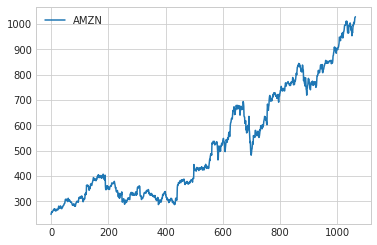

In [6]:
plt.figure(); amzn.plot(); plt.legend(); 

In [7]:
amzn.describe()

,AMZN
count,1064.000000
mean,525.071241
std,219.895835
min,248.229996
25%,326.705010
50%,431.955002
75%,726.662506
max,1028.699951


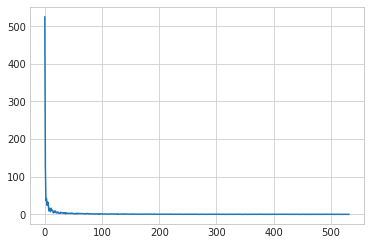

In [8]:
amzn_spectre = abs(np.fft.rfft(amzn['AMZN'])) / train_size
plt.plot(amzn_spectre)

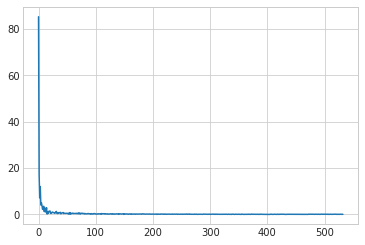

In [9]:
def plot_spectre(data):
    spectre_ = abs(np.fft.rfft(data.iloc[:, 0])) / len(data)
    plt.figure(); plt.plot(spectre_); plt.show()

def plot_spectre_array(data):
    spectre_ = abs(np.fft.rfft(data)) / len(data)
    plt.figure(); plt.plot(spectre_); plt.show()

plot_spectre(nflx)

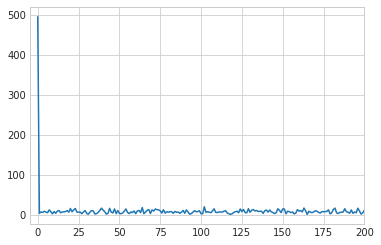

In [10]:
ys = np.array(tuple(random.uniform(0, 1000) for _ in range(train_size)))
ys_spectre = abs(np.fft.rfft(ys)) / train_size
plt.plot(ys_spectre)
plt.xlim([-5, 200])

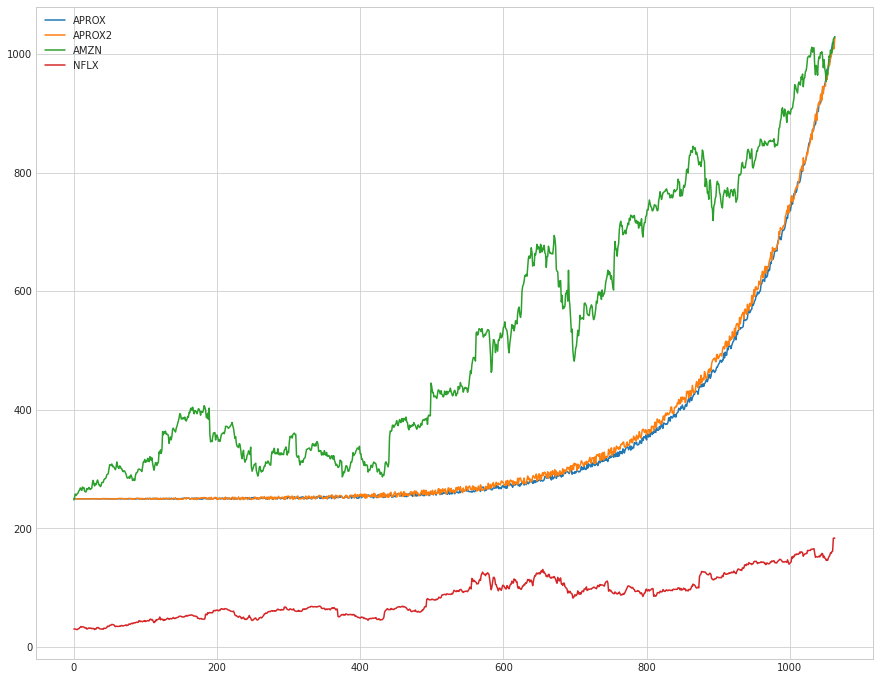

In [11]:
B_ = 10
C_ = 10
A_ = 250 / C_
D_ = 10
dt_ = 0.00066

def aprox(x:float, dt:float = dt_, a:float = A_, b:float = B_, c:float = C_, d:float = D_) -> float:
    x *= dt
    return a*c + x * math.exp(b * x) + d * math.sin(x / d) * random.uniform(-c, c)
    # return a*c + x * math.exp(b * x)

def calc_aprox(len_:int = train_size, dt:float = dt_, a:float = A_, b:float = B_, c:float = C_, d:float = D_): 
    return np.array(tuple(aprox(x, dt, a, b, c, d) for x in range(len_)))


ys1 = calc_aprox()
ys2 = calc_aprox(dt=0.001, a=25,b=6.2,c=10,d=10)
plt.figure(figsize=(15, 12))
plt.plot(ys1, label='APROX')
plt.plot(ys2, label='APROX2')
plt.plot(amzn['AMZN'], label='AMZN')
plt.plot(nflx['NFLX'], label='NFLX')
plt.legend()

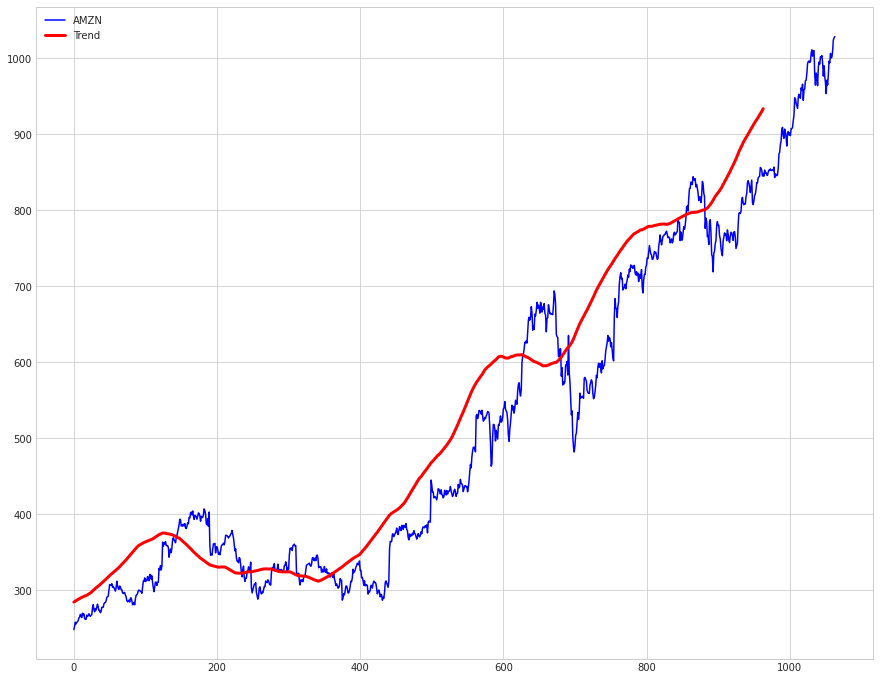

In [12]:
#TODO выделить тренд

win_size = 100
trend = tuple(float(amzn.iloc[i - win_size // 2:i + win_size // 2].mean()) for i in range(win_size // 2, train_size - win_size // 2))
plt.figure(figsize=(15, 12))
plt.plot(amzn['AMZN'], label='AMZN', color='b')
plt.plot(trend, label='Trend', color='r', linewidth=3)
plt.legend()

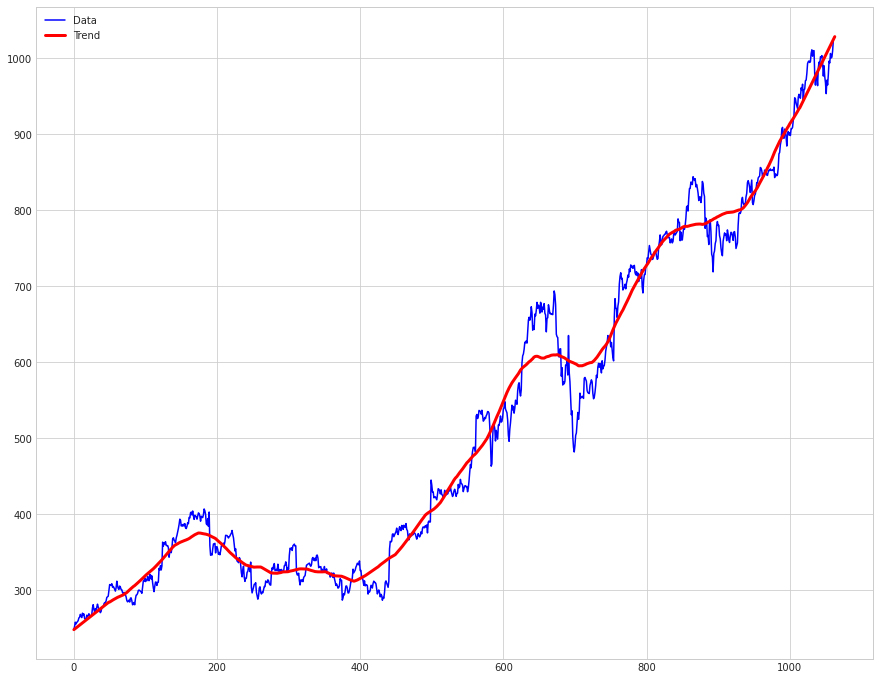

In [13]:
def calc_trend(data, win_size = 100):
    left = list(np.linspace(data[0], data[:win_size].mean(), win_size // 2)) #linear aproximation
    middle = list(float(data[i - win_size // 2:i + win_size // 2].mean()) for i in range(win_size // 2, len(data) - win_size // 2)) #mean window aproximation
    right = list(np.linspace(data[len(data)-win_size-1:].mean(), data[len(data)-1], win_size // 2))
    return left + middle + right

trend_data = amzn
new_trend = calc_trend(trend_data.iloc[:, 0], win_size=100)
plt.figure(figsize=(15, 12))
plt.plot(trend_data, label='Data', color='b')
plt.plot(new_trend, label='Trend', color='r', linewidth=3)
plt.legend()

In [14]:
trend_data = amzn
trend = calc_trend(trend_data.iloc[:, 0])

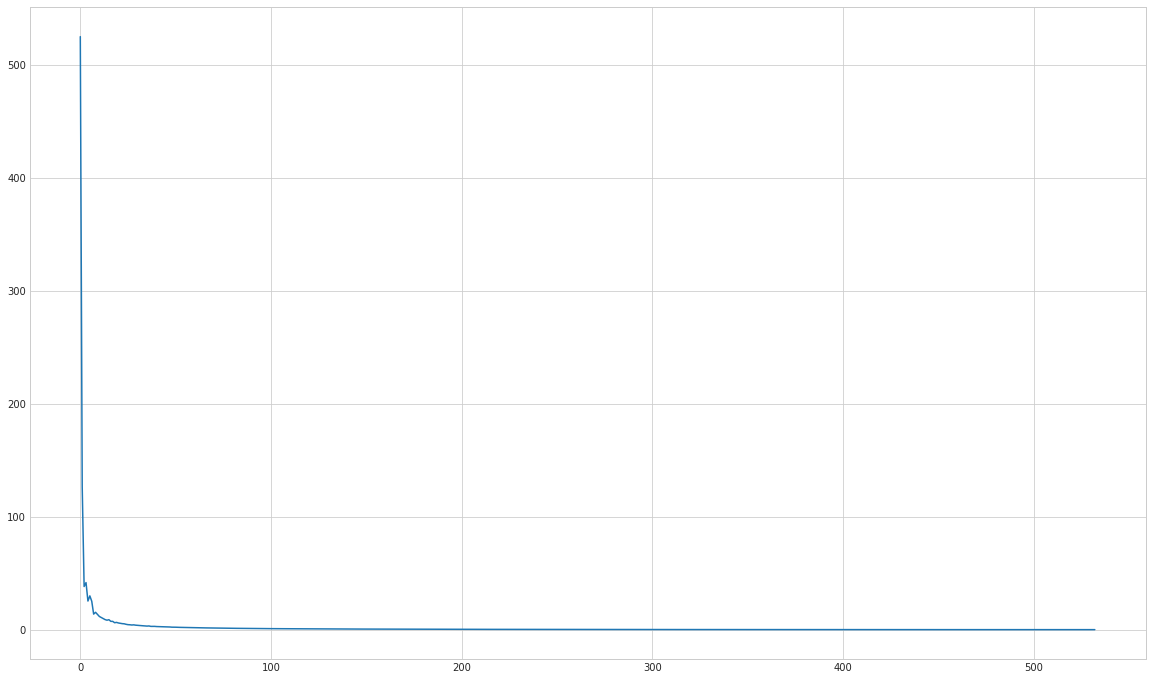

In [15]:
plt.figure(figsize=(20, 12))
plt.plot(abs(np.fft.rfft(trend)) / len(trend))
plt.show()

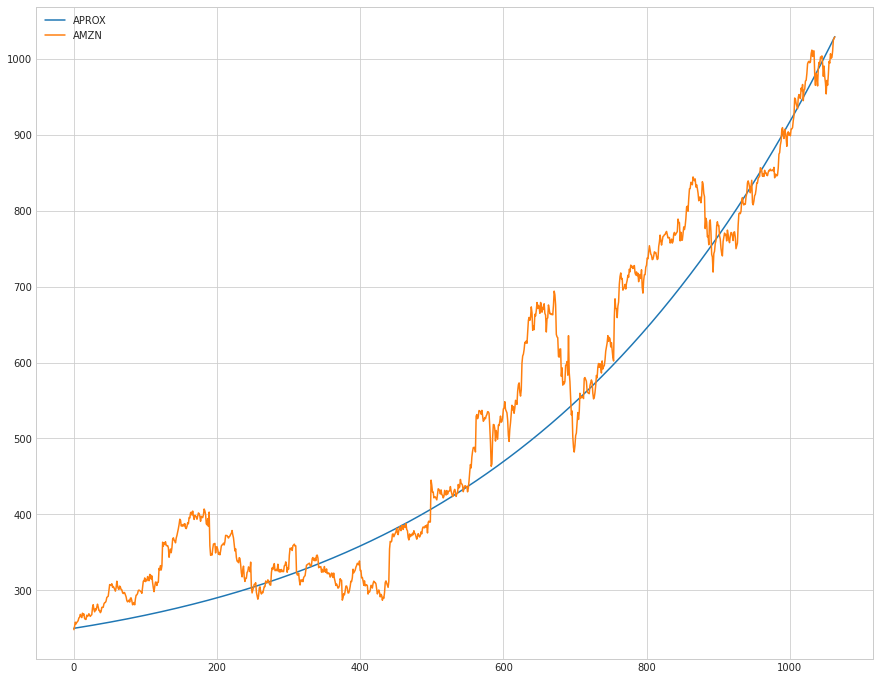

In [16]:
B_ = 1.6
C_ = 10
A_ = 250 / C_
D_ = 50
dt_ = 1 / train_size

def aprox_modernization(x:float, dt:float = dt_, a:float = A_, b:float = B_, c:float = C_, d:float = D_) -> float:
    x *= dt
    return a*c + x * math.exp((1 - b) + b * x) * 780 / math.e + d * math.sin(x / d)

def calc_aprox_modern(len_:int = train_size, dt:float = dt_, a:float = A_, b:float = B_, c:float = C_, d:float = D_): 
    return np.array(tuple(aprox_modernization(x, dt, a, b, c, d) for x in range(len_)))


ys1 = calc_aprox_modern()
plt.figure(figsize=(15, 12))
plt.plot(ys1, label='APROX')
plt.plot(amzn['AMZN'], label='AMZN')
plt.legend()

Params values
[   1.94281951 -662.29444518   16.93973041  301.97335739   53.39859059]
Correlation coeff
[[1.         0.99603161]
 [0.99603161 1.        ]]


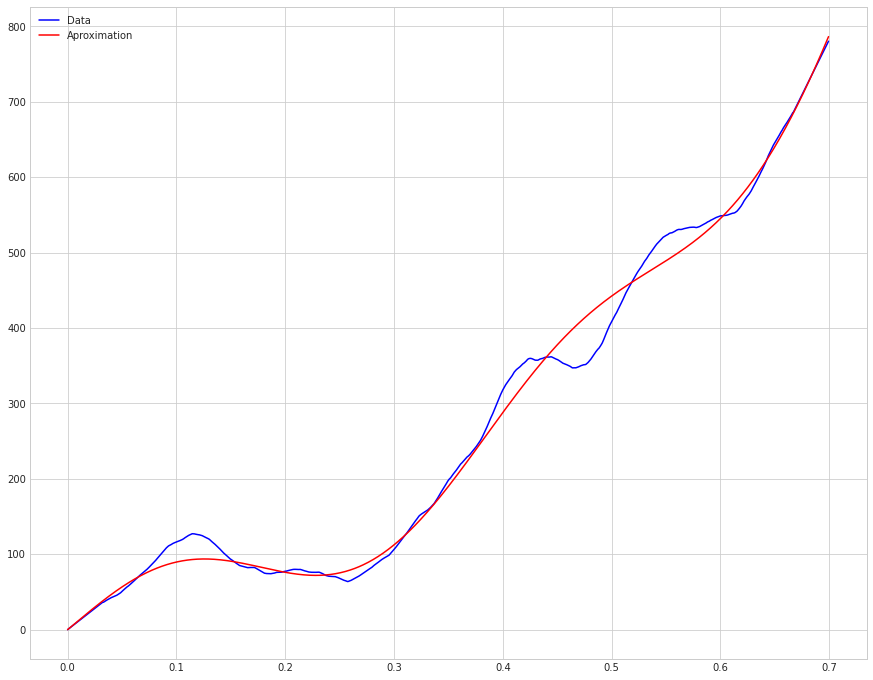

In [17]:
from scipy.optimize import curve_fit

random.seed(100)
def func(x, b, c, d, e, f):
    return e * x * np.exp(b * x) + f * np.sin(x * d)

def func_with_rand(x, b, c, d, e, f):
    return e * x * np.exp(b * x) + f * np.sin(x * d) * random.uniform(-c , c)

data_for_input = amzn
trend = calc_trend(data_for_input.iloc[:, 0])
ydata = np.asarray(list(data_for_input.iloc[:, 0]))
ydata = np.asarray(trend) - trend[0]
xdata = np.asarray(list(range(0, len(ydata)))) / len(input_frame)
popt, pcov = curve_fit(func, xdata, ydata, method='trf')
plt.figure(figsize=(15, 12))
plt.plot(xdata, ydata, color='blue', label='Data')
# plt.plot(xdata[:len(xdata) - win_size//2], tuple(range(0, win_size // 2)) + trend, color='yellow', label='Trend')
y_aprox_data = func(xdata, *popt)
plt.plot(xdata, y_aprox_data, color='red', label='Aproximation')
plt.legend()
print("Params values")
print(popt)
# print(pcov)
print("Correlation coeff")
print(np.corrcoef(y_aprox_data, ydata))

Params values
[1.]
Correlation coeff
[[1.         0.99603161]
 [0.99603161 1.        ]]


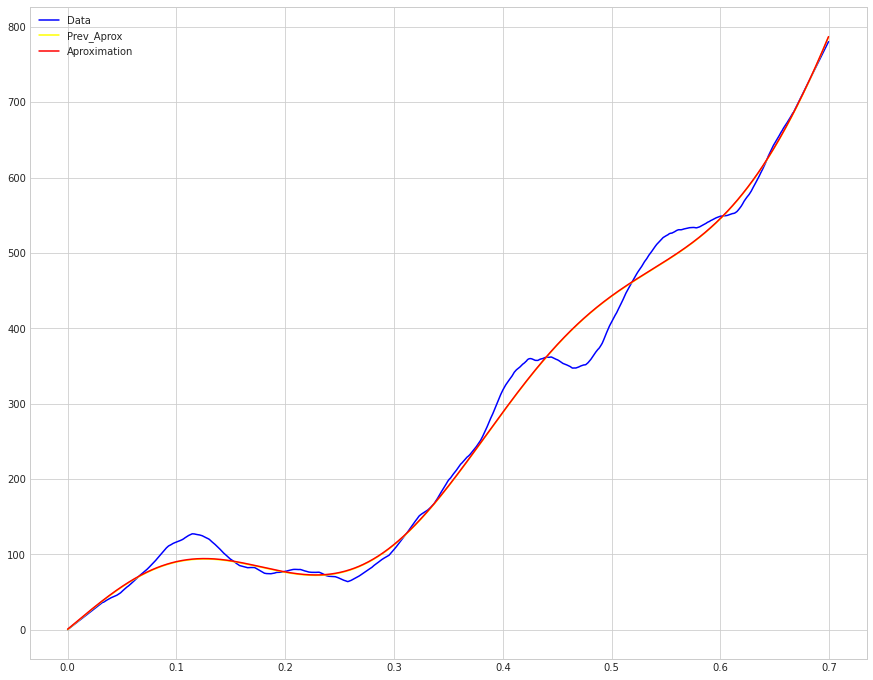

In [18]:
b = popt[0]
d = popt[2]
e = popt[3]
f = popt[4]

def func2(x, c):
    return e * x * np.exp(b * x) + f * np.sin(x * d) + random.uniform(-c, c)

ydata = np.asarray(trend) - trend[0]
xdata = np.asarray(list(range(0, len(ydata)))) / len(input_frame)
popt2, pcov2 = curve_fit(func2, xdata, ydata, method='lm')
plt.figure(figsize=(15, 12))
plt.plot(xdata, ydata, color='blue', label='Data')
y_aprox_data = func2(xdata, *popt2)
y_aprox_data_prev = func(xdata, *popt)
plt.plot(xdata, y_aprox_data_prev, color='yellow', label='Prev_Aprox')
plt.plot(xdata, y_aprox_data, color='red', label='Aproximation')
plt.legend()
print("Params values")
print(popt2)
# print(pcov)
print("Correlation coeff")
print(np.corrcoef(y_aprox_data, ydata))

In [19]:
np.corrcoef(data_for_input.iloc[:, 0], y_aprox_data)

Correlation coeff
[[1.         0.96734016]
 [0.96734016 1.        ]]


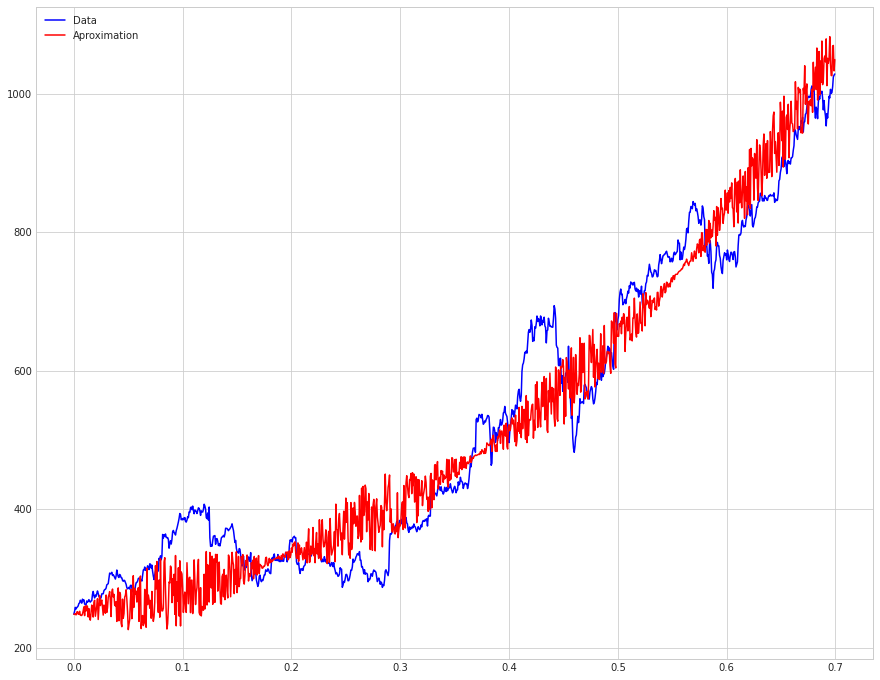

In [20]:
popt_rand_values = popt
popt_rand_values[1] = 1

y_aprox_data_with_rand = tuple(func_with_rand(x, *popt) + trend[0] for x in xdata)

plt.figure(figsize=(15, 12))
plt.plot(xdata, data_for_input.iloc[:, 0], color='blue', label='Data')
plt.plot(xdata, y_aprox_data_with_rand, color='red', label='Aproximation')
plt.legend()
print("Correlation coeff")
print(np.corrcoef(y_aprox_data_with_rand, data_for_input.iloc[:, 0]))

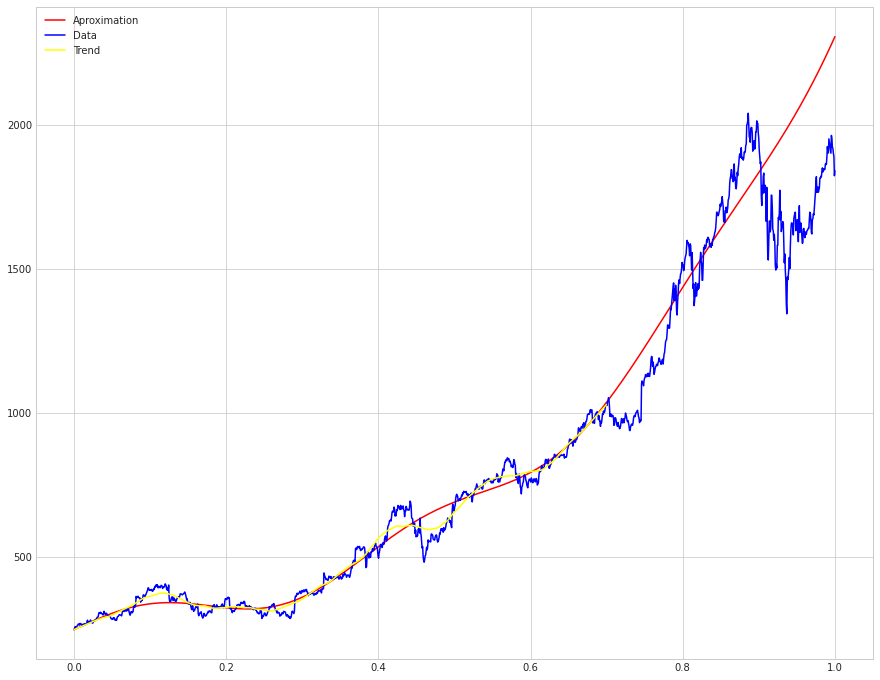

In [21]:
x_for_test = np.asarray(np.linspace(0, 1, len(input_frame)))
plt.figure(figsize=(15, 12))
plt.plot(x_for_test, func(x_for_test, *popt) + trend[0], color='red', label='Aproximation')
plt.plot(x_for_test, input_frame['AMZN'], color='blue', label='Data')
plt.plot(x_for_test[:len(trend)], trend, color='yellow', label='Trend')
# plt.xlim([-0.1, 0.9])
# plt.ylim([-0.1, 3500])
plt.legend()

In [22]:
from datetime import datetime

last_training_date = datetime.strptime(str(dates.iloc[-1, 0]), '%m/%d/%Y')
last_date = datetime.strptime(str(input_frame.iloc[-1, 0]), '%m/%d/%Y')

print(f'Last trining date: {last_training_date.date()}\nLast date: {last_date.date()}\nDifference: {last_date - last_training_date}')

Last trining date: 2017-07-20
Last date: 2019-05-14
Difference: 663 days, 0:00:00


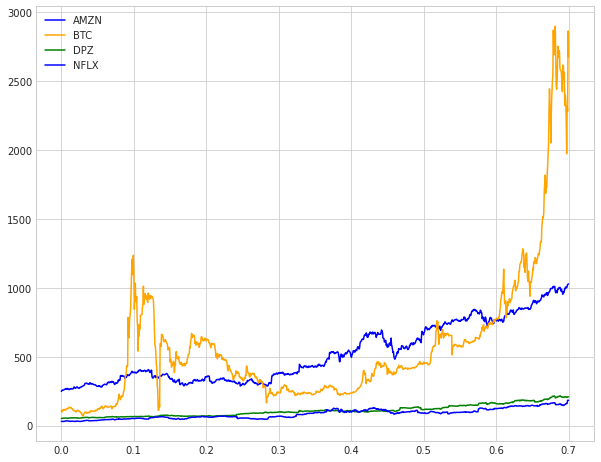

In [23]:
xs = np.asarray(np.linspace(0, 0.7, len(amzn)))
plt.figure(figsize=(10, 8))
plt.plot(xs, amzn, label='AMZN', color='blue')
plt.plot(xs, btc, label='BTC', color='orange')
plt.plot(xs, dpz, label='DPZ', color='green')
plt.plot(xs, nflx, label='NFLX', color='blue')
plt.legend(loc=2)